In [1]:
import sys
sys.path.append('../../public-Git/')
sys.path.append('../../public-Git/demo_Intraday/')

from factor_function import *
from utils.stg_functions_local import *

%matplotlib inline

In [2]:
class mom_rev(Factor):
    name = 'mom_rev'
    islimitbuy = True
    islimitsell = True
    # 依赖的基础因子名称，包含 'datetime', 'date', 'time', 'issue', 'open', 'high', 'low', 'close',
    #                           'volume', 'value', 'num_trades', 'vwap1', 'vwap2', 'preclose', 'adj',
    #                           'is_limit_buy', 'is_limit_sell', 'filterFlag'字段
    dependencies = ['close', 'preclose']

    def calc(self, data):
        # 准备所需字段
        close = data['close'].replace([0], np.nan)
        # preclose = data['preclose'].replace([0], np.nan)
        preclose = data['close'].shift(1).fillna(data['preclose']).replace([0], np.nan)
        ret = close/preclose - 1
        # 对于frequency='30m'和frequency='60m',可用数据截止到1453,对于后面的行删除
        factor_time = (close.index.hour*100+close.index.minute) < 1458

        ret = ret.loc[factor_time, :]
        factor_rev = -(ret.sub(ret.mean(axis=1, skipna=True), axis=0).div((ret.max(axis=1, skipna=True)-ret.min(axis=1, skipna=True)).replace(0, np.nan), axis=0))
        factor_rev_decay = factor_rev * 0
        for i in range(5):
            weight = 1 - 0.2 * i
            factor_rev_decay += factor_rev.shift(i, fill_value=0) * weight
        return factor_rev_decay.replace([-np.inf, np.inf], np.nan)

In [3]:
class umr_rev(Factor):
    name = 'umr_rev'
    islimitbuy = True
    islimitsell = True
    dependencies = []

    def calc(self, data):
        label = 'tr'
        factor = feather.read_dataframe(f'../data/factor_rev/{label}_rev/{label}_rev.feather')
        factor = factor.pivot(index='datetime', columns='issue', values='rev')
        return factor

开始计算umr_rev
因子数据计算完成，耗时0:00:01.722265
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
umr_rev------输出对标超额收益模式指标
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 5.0%, not exceeded: OK!
FactorValues Quantiles Statistics


,min,max,mean,std,count,daily_count,count %
factor_quantile,,,,,,,
1,-3.071403e-04,-5.267945e-07,-7.765011e-06,1.316343e-05,120827,99.0,2.09
2,-2.374716e-05,-2.981156e-07,-1.987443e-06,2.000072e-06,120245,99.0,2.08
3,-1.483924e-05,-2.174670e-07,-1.224991e-06,1.165249e-06,120309,99.0,2.08
4,-1.105822e-05,-1.628037e-07,-8.928391e-07,8.299321e-07,120183,99.0,2.08
5,-8.984685e-06,-1.287219e-07,-7.017656e-07,6.443902e-07,120294,99.0,2.08
6,-7.286529e-06,-1.042103e-07,-5.761447e-07,5.235833e-07,120317,99.0,2.08
7,-6.011462e-06,-8.045142e-08,-4.858113e-07,4.383740e-07,120178,99.0,2.08
8,-5.142953e-06,-6.673639e-08,-4.174372e-07,3.745905e-07,120183,99.0,2.08
9,-4.240050e-06,-5.322805e-08,-3.635298e-07,3.248746e-07,120347,99.0,2.08


Turnover Analysis


,1D
QuantileTop Mean Turnover,3.56




Benchmark AnalysisMode Returns Analysis 


,factor
Top Return(%),-22.53
Bottom Return,-129.06
Top ReturnAE(%),-91.73
Top ReturnAE MDD(%),-60.30
Top ReturnAE SPR,-0.46




Benchmark AnalysisMode Returns Analysis By Year 


,Top Ret(%),Top RetAE(%),Bottom Ret(%),SPR,MDD(%)
date,,,,,
2023,-22.53,-91.73,-129.06,-7.19,-60.3




Information Analysis


,ret
IC Mean,0.069
IR,0.201
IC Mean SD_20D,0.199
IR SD_20D,0.750
IC Mean SD_60D,0.257
IR SD_60D,1.108




                        factor
Top ReturnAE(%)     -91.733366
Top ReturnAE MDD(%) -60.295858
Top ReturnAE SPR     -0.461551
IC_20                 0.199466
IR_20                 0.750348
IC_60                 0.256896
IR_60                 1.108197
Top Mean turnover     3.559951
umr_rev计算完成，耗时0:00:16.919971


<Figure size 640x480 with 0 Axes>

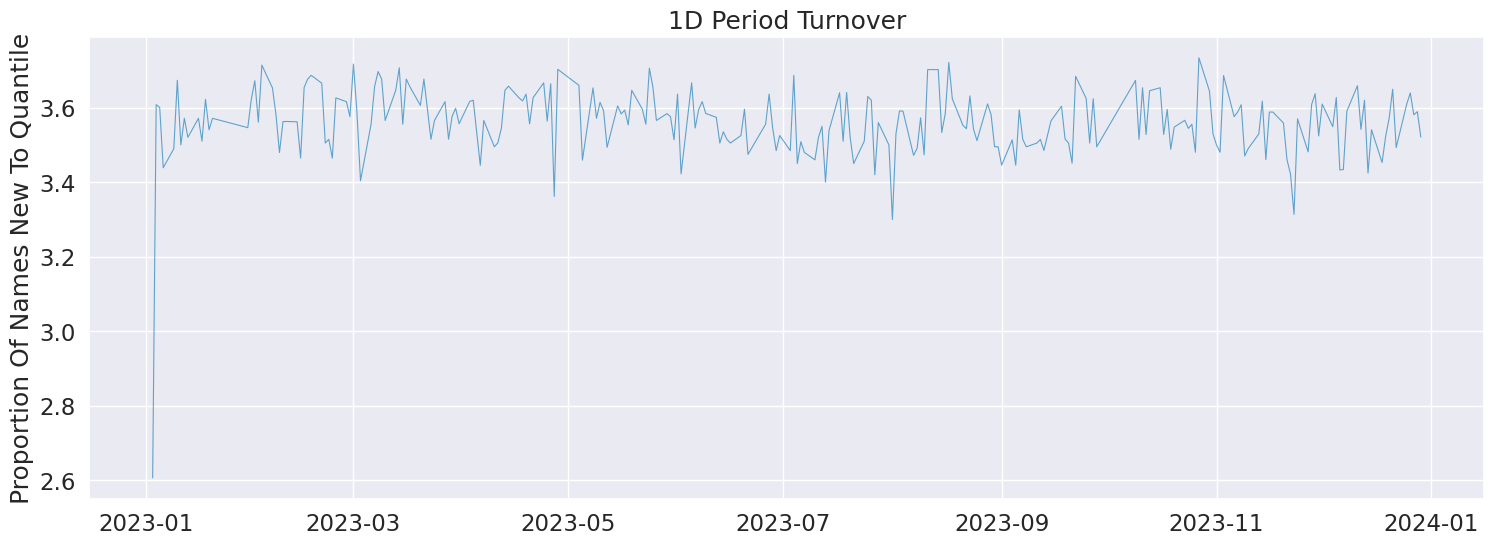

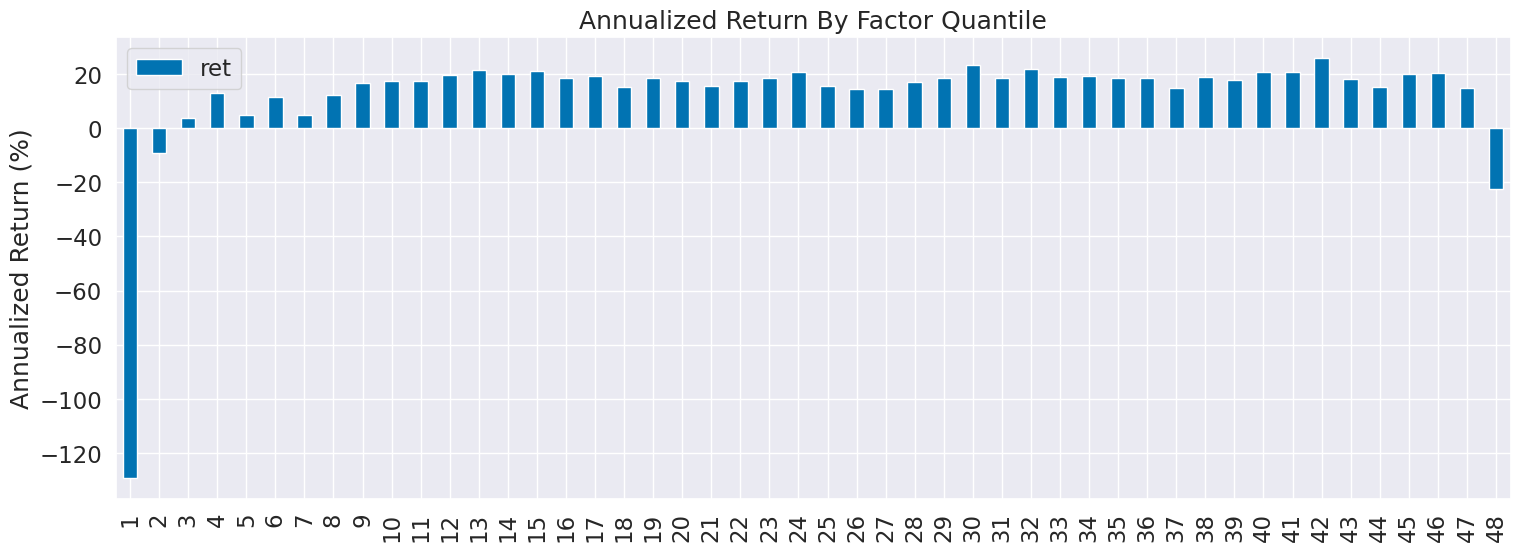

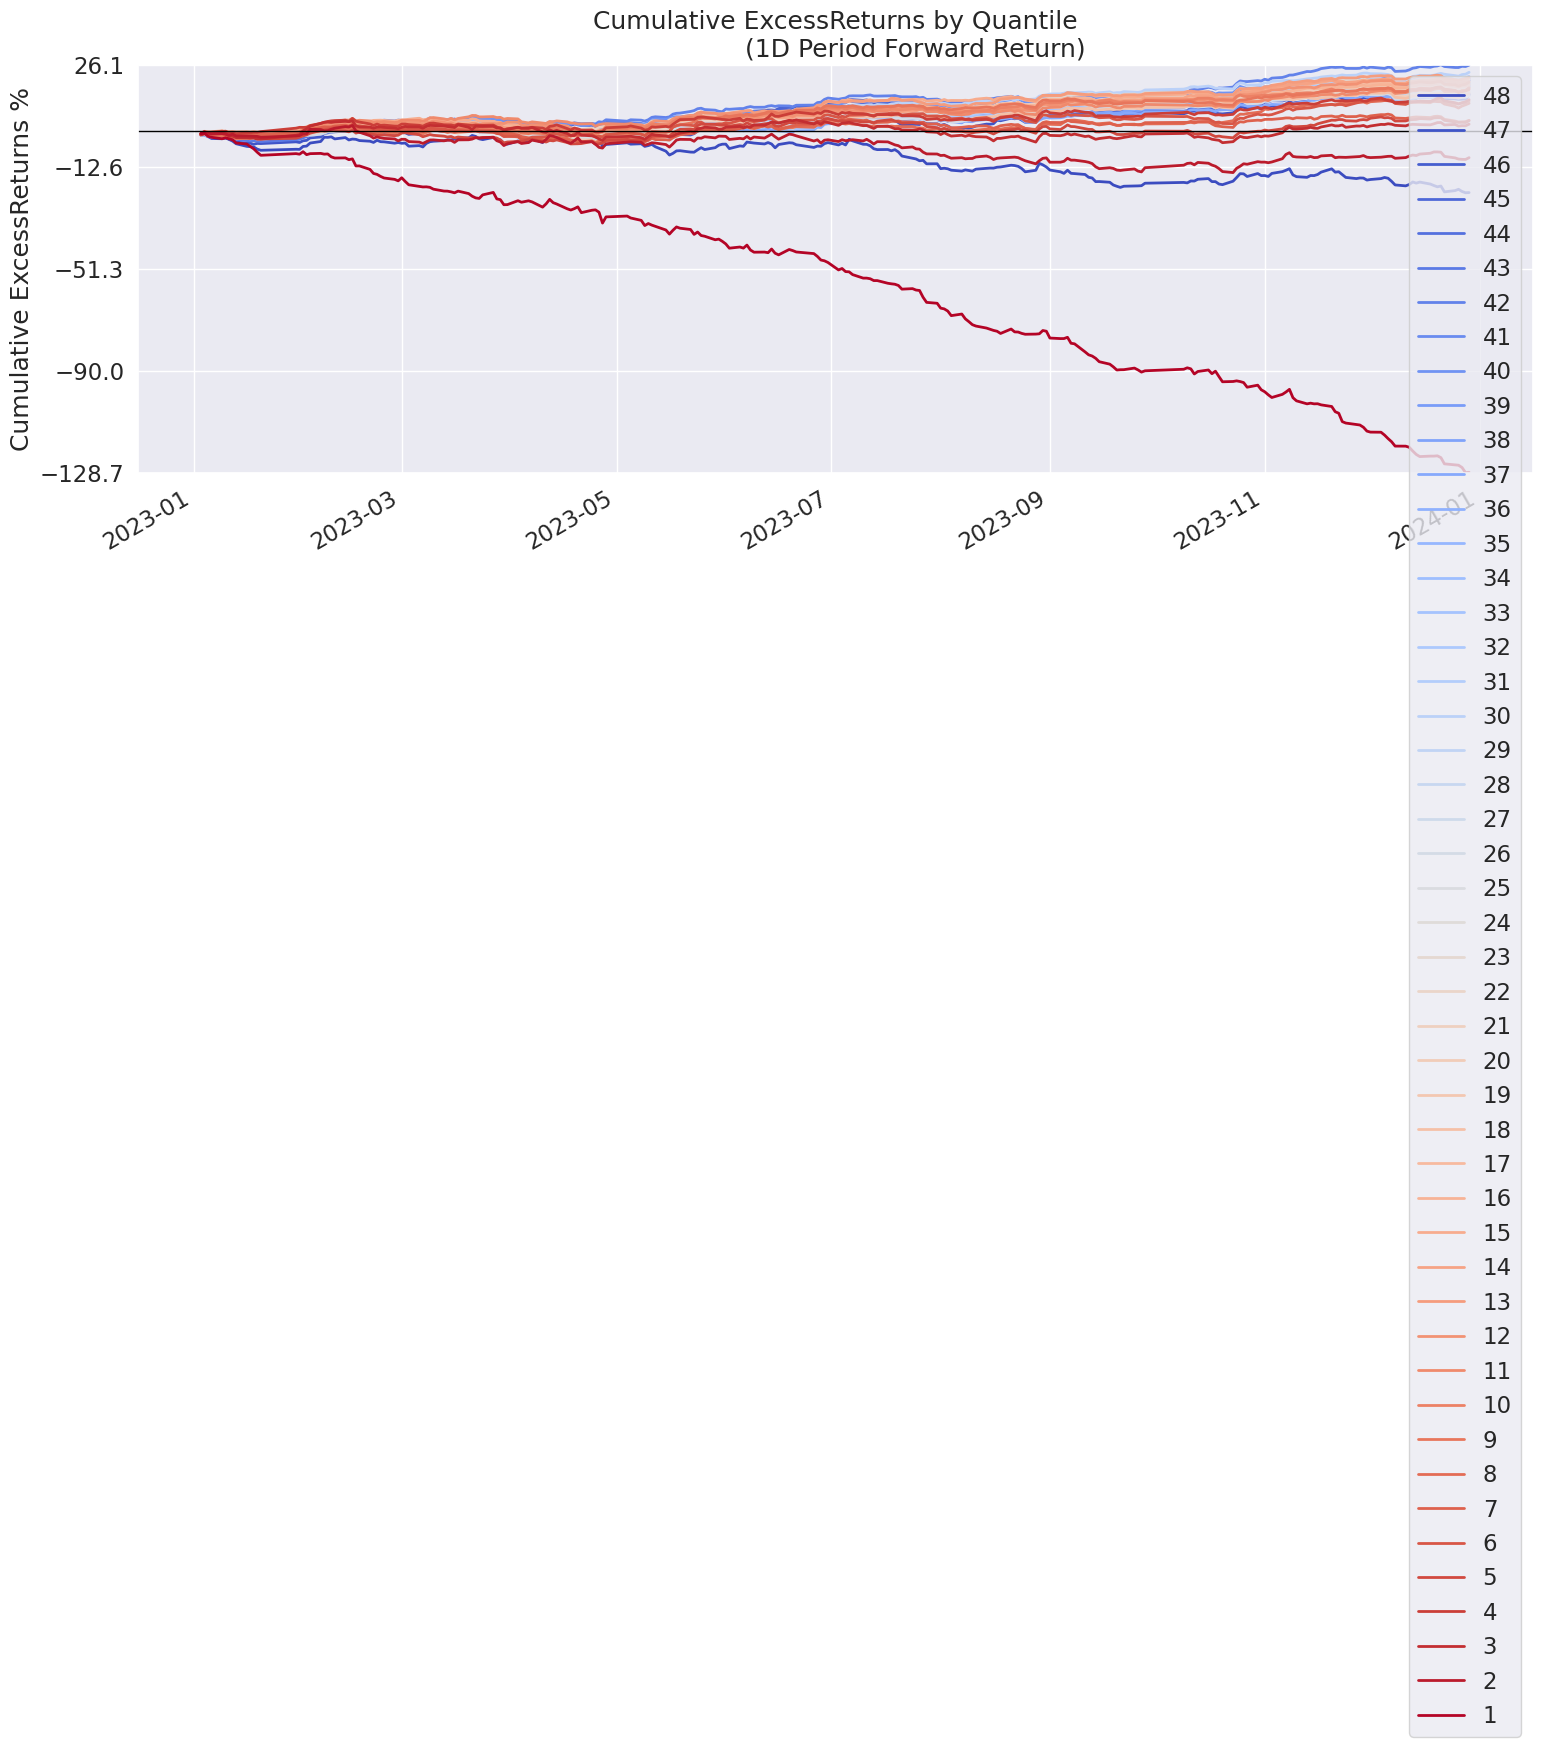

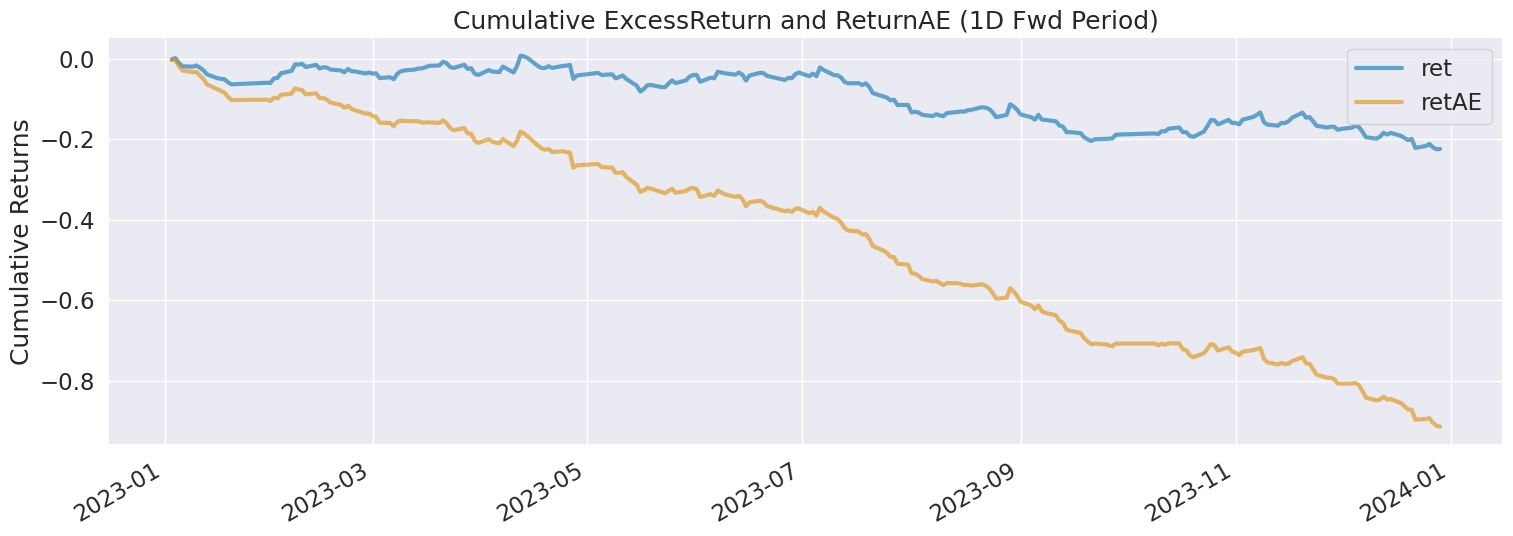

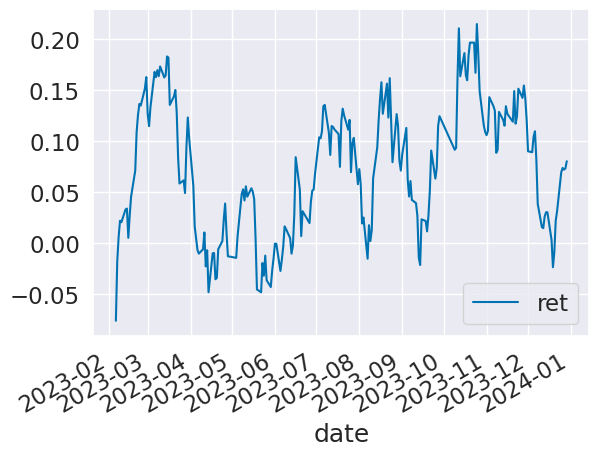

In [4]:
index_code = '000905'

get_base_price(start_date='20230101', end_date='20231231', frequency='60m')

start_datetime = datetime.datetime(2023, 1, 1)
end_datetime = datetime.datetime(2023, 12, 30)
factor = umr_rev()

time_tik = datetime.datetime.now()
print(f"开始计算{factor.name}")
results = analysis(start_datetime=start_datetime, end_datetime=end_datetime, factor=factor, benchmark=index_code, plot=True)
print(f"{factor.name}计算完成，耗时{datetime.datetime.now()-time_tik}")